# Lab 3

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 演算法的實作可以參考[lab-3](https://yuanyuyuan.github.io/itcm/lab-3.html), 有任何問題歡迎找助教詢問。
4. **Deadline: 10/30(Wed.)**

In [1]:
name = "歐陽秉志"
student_id = "B05201012"

---

# Exercise 1

## Let $g(x)=\ln(4+x-x^2)$ and $\alpha$ is a fixed point of $g(x)$ i.e. $\alpha = g(\alpha).$ 

- ### Part A. Implement your fixed-point algorithm and solve it with initial guess $x_0=2$ within tolerance $10^{-10}$, and answer the questions of error behavior analysis below.
- ### Part B. Redo Part A. by applying Aitken's acceleration.

---

### Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Implement the target function $g(x)=\ln(4+x-x^2)$

In [3]:
def g(x):
    # ===== 請實做程式 =====
    return np.log(4+x-x**2)
    # ====================

In [4]:
assert round(g(0), 4) == 1.3863

### Run built-in [fixed-point method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html#rf001026ae057-1) with Python SciPy, and use this accurate value as the fixed point $\alpha$

In [5]:
from scipy import optimize
alpha = optimize.fixed_point(g, x0=2, xtol=1e-12)
print('The fixed point is', alpha)

The fixed point is 1.2886779668238684


### Visualization

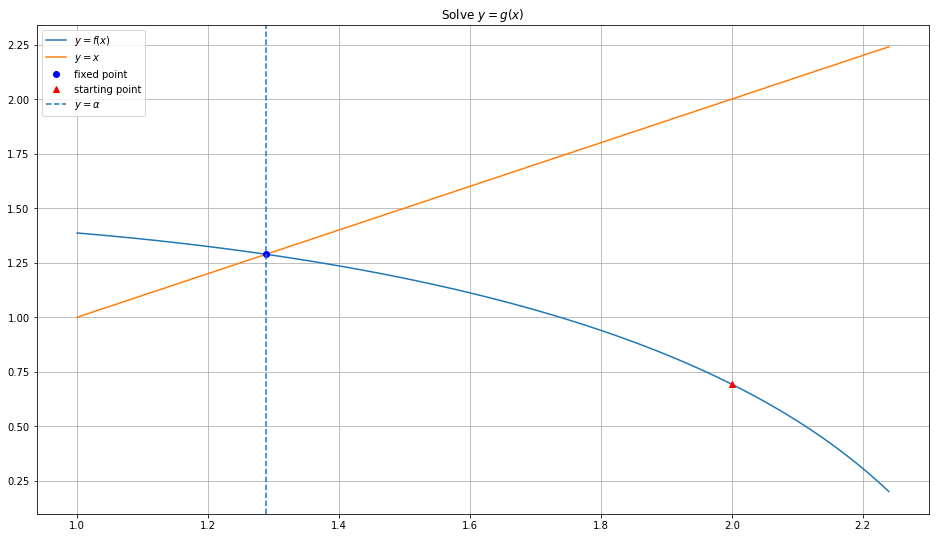

In [6]:
x_range = np.arange(1, 2.25, 0.01)
plt.figure(figsize=(16, 9))
plt.title(r'Solve $y=g(x)$')
plt.plot(x_range, g(x_range), label=r'$y=f(x)$')
plt.plot(x_range, x_range, label=r'$y=x$')
plt.plot(alpha, g(alpha), 'bo', label='fixed point')
plt.plot(2.0, g(2.0), 'r^', label='starting point')
plt.axvline(x=alpha, linestyle='--', label=r'$y=\alpha$')
plt.gca().legend()
plt.grid()
plt.show()

---

## Part A.

### 1. Find the fixed point of $g(x)$ using your fixed-point iteration to within tolerance $10^{-10}$ with initial guess $x_0=2$.

#### 1-1. Implement the fixed point method

In [9]:
def fixed_point(
    func,
    x_0,
    tolerance=1e-7,
    max_iterations=5,
    report_history=False
):
    '''Find the fixed point of the given function func

    Parameters
    ----------
    func : function
        The target function.
    x_0 : float
        Initial guess point for a solution func(x)=x.
    tolerance: float
        One of the termination conditions. Error tolerance.
    max_iterations : (positive) integer
        One of the termination conditions. The amount of iterations allowed.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process
        history: {'x_n': list}
    '''

    # ===== 請實做程式 =====
    x_n = x_0
    num_iterations = 0
    
    # history of solving process
    if report_history:
        history = {'estimation': [], 'error': []}
        
    while True:
        
        # Find the value of f(x_n)
        f_of_x_n = func(x_n)
        
        # Evaluate the error
        error = abs(f_of_x_n - x_n)
        
        if report_history:
            history['estimation'].append(x_n)
            history['error'].append(error)
        
        # Satisfy the criterion and stop
        if error < tolerance:
            print('Found solution after', num_iterations,'iterations.')
            if report_history:
                return (x_n, history)
            else:
                return x_n
        
        # Check the number of iterations
        if num_iterations < max_iterations:
            num_iterations += 1
            
            # Find the next approximation solution
            x_n = f_of_x_n
        
        # Satisfy the criterion and stop
        else:
            print('Terminate since reached the maximum iterations.')
            if report_history:
                return (x_n, history)
            else:
                return x_n
    # ====================

#### 1-2. Find the root

In [59]:
solution, history = fixed_point(
    # ===== 請實做程式 =====
    g,
    2.0,
    tolerance=1e-10,
    max_iterations=100,
    report_history=True
    # ====================
)

Found solution after 28 iterations.


In [60]:
print('My estimation is', solution)

My estimation is 1.2886779668876651


### 2. Estimate graphically the asymptotic error constant C 
### $$\lim_{n\to\infty} \frac{|x_{n+1} - \alpha|}{|x_{n} - \alpha|} = C$$

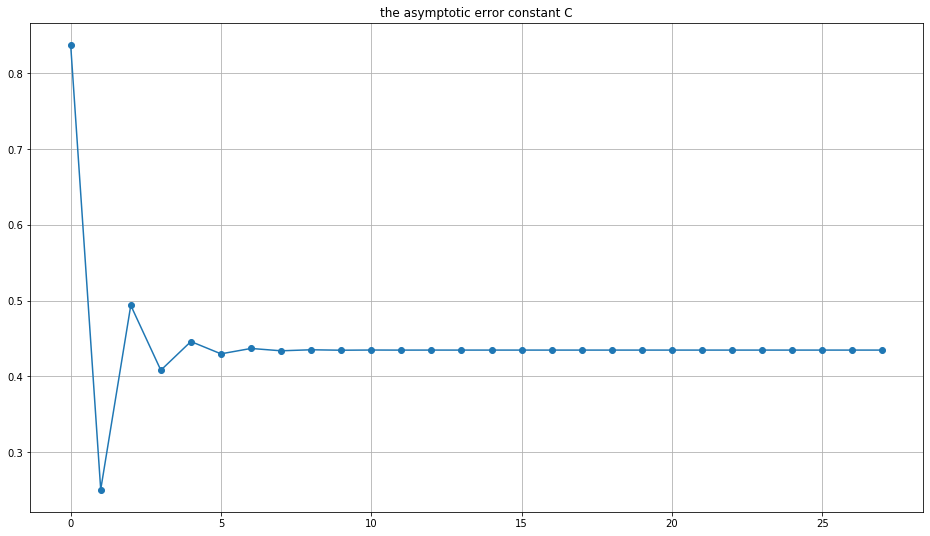

In [61]:
'''
Hint:
    1. Prepare the sequences: x_n(from the history of algorithm)
    2. Compute the error of sequence: e_n
    3. Compute the sequence: e_{n+1}/e_{n}
    4. Plot the curve
    5. Fill in the name of x,y axes
    6. Show the plot
''' 
# ===== 請實做程式 =====
x = history['estimation']
e = abs(x-alpha)
q = [e[i+1]/e[i] for i in range(len(e)-1)]

plt.figure(figsize=(16, 9))
plt.plot(e[1:] / e[:-1], 'o-')
plt.title("the asymptotic error constant C")
plt.grid()
plt.show()
# ====================

---

## Part B.

### 1. Accelerate the convergence of the sequence $\{x_n\}$ obtained in _Part A._ using Aitken's  $\Delta^2$ method, yielding sequence $\{\hat{x}_n\}$. 

#### 1-1. Introduce Aitken's acceleration into the original method.

In [64]:
def aitken(
    func,
    x_0,
    tolerance=1e-7,
    max_iterations=5,
):
    '''Approximate solution of f(x)=0 on interval [a,b] by the secant method.

    Parameters
    ----------
    func : function
        The target function.
    x_0 : float
        Initial guess point for a solution f(x)=x.
    tolerance: float
        One of the termination conditions. Error tolerance.
    max_iterations : (positive) integer
        One of the termination conditions. The amount of iterations allowed.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process
        history: {'x_n': list}
    '''

    # ===== 請實做程式 =====
    x0 = x_0
    x_n = x_0
    num_iter = 0
    history = {'x_n': []}
    
    while True:
        x1 = func(x0)
        x2 = func(x1)
        xn = x2 - ((x2-x1)**2 / ((x2-x1)-(x1-x0)))
        
        num_iter += 1
        error = abs(xn-x0)
        history['x_n'].append(xn)
        
        if error < tolerance:
            print('Found solution after', num_iter,'iterations.')
            return xn, history
        
        if num_iter < max_iterations:
            x0 = xn
        else:
            print('Terminate since reached the maximum iterations.')
            return xn, history
    # ====================

#### 1-2. Find the root

In [65]:
solution, history = aitken(
    # ===== 請實做程式 =====
    g, 
    2.0, 
    tolerance=1e-10,
    max_iterations=100
    # ====================
)

Found solution after 5 iterations.


In [66]:
print('My estimation is', solution)

My estimation is 1.2886779668238684


### 2. Plot the error curves of each algorithm w.r.t iterations $n$ in log scale to compare the convergence rates. You may see a figure like the one in our lecture.

<figure>
  <img src="aitken.png" style="width:60%">
    <figcaption>Ref. Page15 of <a href="https://ceiba.ntu.edu.tw/course/7a770d/content/cmath2019_note1_aitken.pdf">cmath2019_note1_aitken.pdf</a></figcaption>
</figure>

Found solution after 28 iterations.
Found solution after 5 iterations.


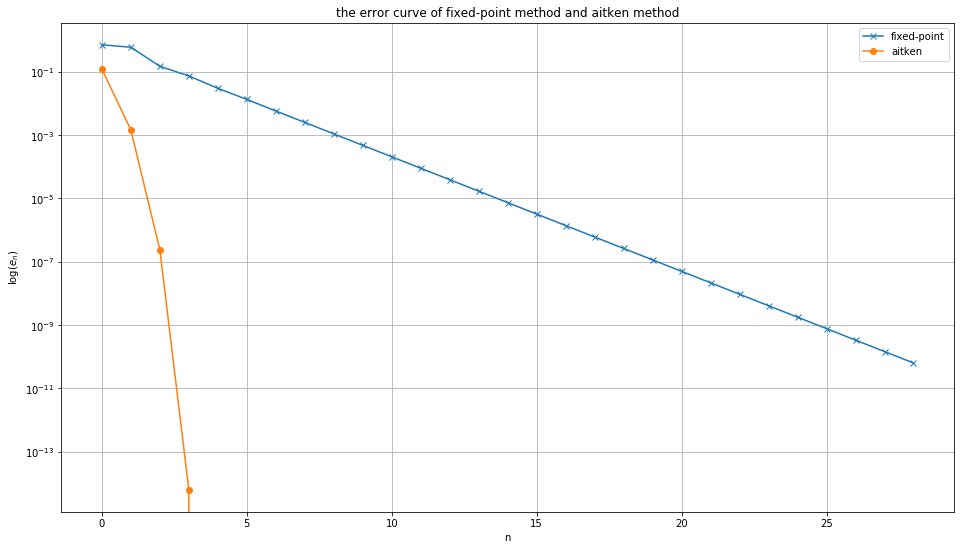

In [80]:
'''
Hint:
    1. Prepare the sequences: x_n, x_n_hat(from the history of each algorithm)
    2. Compute the error of sequences: e_n, e_n_hat
    3. Plot the curves of e_n, e_n_hat respectively
    4. Change scale into log
    5. Fill in the name of x,y axes
    6. Enable legend(show curve names)
    7. Show the plot
''' 
# ===== 請實做程式 =====
sol_f, his_f = fixed_point(g, 2.0, tolerance=1e-10, max_iterations=100, report_history=True)
sol_a, his_a = aitken(g, 2.0, tolerance=1e-10, max_iterations=100)

x = his_f['estimation']
e = abs(x-alpha)

xh = his_a['x_n']
eh = abs(xh-alpha)

plt.figure(figsize=(16, 9))
plt.plot(e, 'x-')
plt.plot(eh, 'o-')
plt.title("the error curve of fixed-point method and aitken method")
plt.xlabel('n')
plt.ylabel('log($e_n$)')
plt.yscale("log")
plt.legend(["fixed-point", "aitken"])
plt.grid()
plt.show()
# ====================